## Import Libraries

In [ ]:
#pip install yfinance

#### The following libraries must be installed before getting started.

**Pandas** — a python library that loads the data file as a pandas data frame for analyzing the data.

**Matplotlib** — a python package for plotting graphs.

**Scikit-learn** — an open-source python library used in data analysis that supports machine learning models, pre-processing, model evaluation, and training utilities. It also acts as a sub-library for train_test_split, RandomForestRegressor, StandardScaler, RandomizedSearchCV, and metrics.

**Numpy** — a python library that works with arrays.

**Yfinance** — a python open-source library used to access financial data.

In [ ]:
#import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### These are what each column means in the csv

**Date** - The stock value date

**Open** - Open price of the stock, at the beginning of the trading day

**High** - Highest point of the stock price, on a trading day

**Low** - Lowest point of the stock price, on a trading day

**Close** - Close price of the stock, at the end of a trading day

**Adj Close** - Amended closing price for dividends of stock value the stock's 
value after distributing dividends

**Volume** - Number of traded stocks in the market over a period

In [ ]:
msft_df = pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
msft_df = msft_df.dropna()
msft_df = msft_df[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,64.120003,65.139999,64.120003,65.029999,60.704510,20680000
1,2017-03-23,64.940002,65.239998,64.769997,64.870003,60.555168,19269200
2,2017-03-24,65.360001,65.449997,64.760002,64.980003,60.657841,22617100
3,2017-03-27,64.629997,65.220001,64.349998,65.099998,60.769852,18614700
4,2017-03-28,64.959999,65.470001,64.650002,65.290001,60.947208,20080400


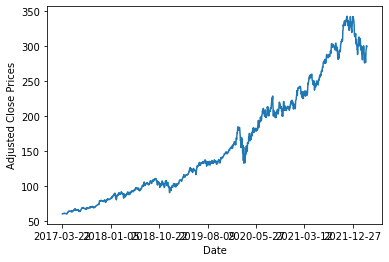

In [ ]:
msft_df.set_index("Date", inplace=True)
msft_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

## Step 1: Reading File

In [ ]:
MSFT = pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
MSFT.set_index("Date", inplace=True)
MSFT.dropna(inplace=True)

## Step 2: Feature Selection

x is holding values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns.

y is holding values for the 'Adj-close' column

In [ ]:
x = MSFT.iloc[:, 0:5].values
y = MSFT.iloc[:, 4].values

## Step 3: Dividing Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

## Step 4: Feature Scaling

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Step 5: Hyperparameter Tuning

#### For a random forest regression model, the best parameters to consider are:

**n_estimators** — number of trees in the forest

**max_depth** — maximum depth in a tree

**min_samples_split** — minimum number of data points before the sample is split

**min_samples_leaf** — minimum number of leaf nodes that are required to be sampled

**bootstrap** — sampling for data points, true or false

**random_state** — generated random numbers for the random forest.

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
model = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator = model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


## Step 6: Applying Random Forest 

Now it's time to apply Random Forest since the dataset is ready. The first step is to pick a value for the random state and build a tree based on the number of random trees. Random Forest prevents overfitting by creating random subsets of the features and building smaller trees using these subsets. To build a forest, the data has to be trained, and this is where finding the best hyperparameters comes into action.

In [ ]:
# 1: model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
# 2: model = RandomForestRegressor(n_estimators=50, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=False)
model = RandomForestRegressor(n_estimators=1000, random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)


model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)


[ 61.06072864 109.48047968  68.09333857 233.02807641  80.53929452
  61.13542895  94.05931913 116.35227602 107.700227   130.35777506
 134.58116269 154.322708   210.395859   102.00437925 167.51267826
 217.0823297  208.97292347 323.85989578  69.10097221 288.09607853
 211.71381633  71.30657959 160.04324469 106.9467015  322.82517563
  87.06386896 210.4297683  249.72183032 100.774811   186.66541588
  80.13478812 186.17613372 285.457825    65.211502   211.55724372
 132.89965469 197.38747234 134.43674924 103.89759937  97.2276681
  91.38180681 180.72827944 251.107834   334.11473957 205.72152439
  60.64134664 180.54762462 191.26358     72.005341   144.46896238
 209.44616768  89.13068402 292.56659764  66.05497807 134.81102367
 100.84808889 179.822845   298.664917    63.54756223  74.39524529
  97.276588   176.504044   278.36772766  90.70180512  98.55308303
 211.99444123 223.3068661  134.1420803  245.84315539 279.403046
  78.508392    81.08277275 208.3470188   61.06792484  72.52302329
 163.22161392

## Step 7: Getting Metrics

**RSME** - standard deviation of residuals (prediction errors), how far the data points are from the prediction line (regression line). RSME is best for accuracy when it is less than 0.5 and greater than 0.3

**MEA** - average magnitude of errors in a set of predictions without considering their direction. the lower the error, the better

**MSE** - sum of absolute value of error. the lower the MSE value, the higher the prediction accuracy

**R^2** - shows how well a model fits a given dataset, and indicates the closeness of a regression line. the higher the r-squared, the better a model's fit is

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.2475
Mean Squared Error: 0.1932
Root Mean Squared Error: 0.4395
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.84 %.


## Step 8: Getting Future Days From Predicted Values and Plot

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=MSFT.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data_msft.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions_msft.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions_msft.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions_msft.csv")

In [ ]:
#oneyear_df.show(5)

## One Year Prediction


Buy price and date
            Predictions
Unnamed: 0             
2022-05-05    60.641347
Sell price and date
            Predictions
Unnamed: 0             
2022-09-15   337.212738


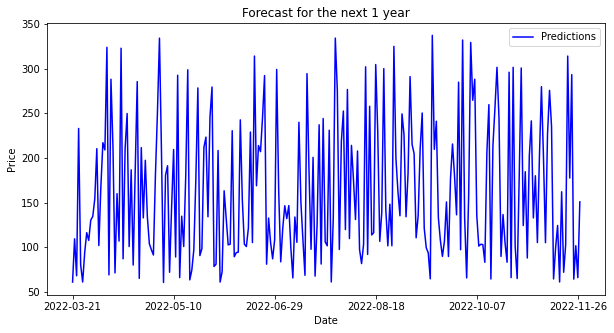

In [ ]:
oneyear_msft_pred = pd.read_csv("/content/one-year-predictions_msft.csv")
oneyear_msft_pred.set_index(list(oneyear_msft_pred.columns[[0]]), inplace=True)    # list(df.columns[[0,2]])
buy_price = min(oneyear_msft_pred["Predictions"])
sell_price = max(oneyear_msft_pred["Predictions"])
oneyear_buy = oneyear_msft_pred.loc[oneyear_msft_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_msft_pred.loc[oneyear_msft_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_msft_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## One Month Prediction

Buy price and date
            Predictions
Unnamed: 0             
2022-03-21    61.060729
Sell price and date
            Predictions
Unnamed: 0             
2022-04-07   323.859896


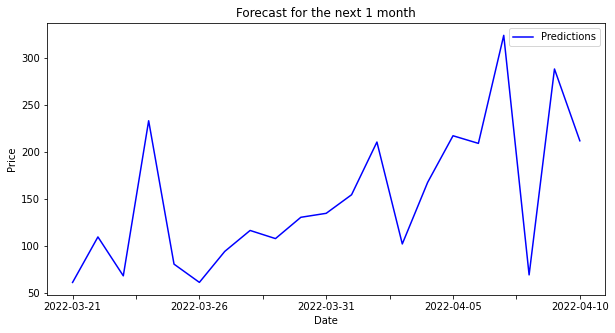

In [ ]:
onemonth_msft_pred = pd.read_csv("one-month-predictions_msft.csv")
onemonth_msft_pred.set_index(list(onemonth_msft_pred.columns[[0]]), inplace=True)
buy_price = min(onemonth_msft_pred["Predictions"])
sell_price = max(onemonth_msft_pred["Predictions"])
onemonth_buy = onemonth_msft_pred.loc[onemonth_msft_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_msft_pred.loc[onemonth_msft_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_msft_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Five Days Prediction

Buy price and date
            Predictions
Unnamed: 0             
2022-03-21    61.060729
Sell price and date
            Predictions
Unnamed: 0             
2022-03-24   233.028076


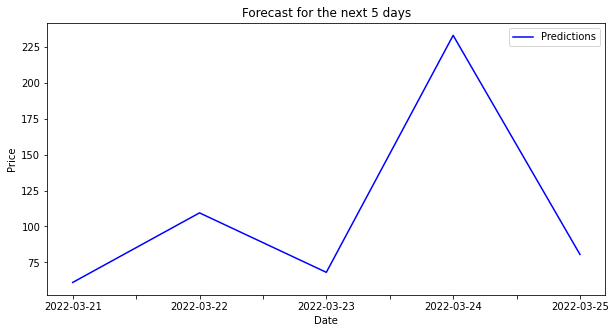

In [ ]:
fivedays_msft_pred = pd.read_csv("five-days-predictions_msft.csv")
fivedays_msft_pred.set_index(list(fivedays_msft_pred.columns[[0]]), inplace=True)
buy_price = min(fivedays_msft_pred["Predictions"])
sell_price = max(fivedays_msft_pred["Predictions"])
fivedays_buy = fivedays_msft_pred.loc[fivedays_msft_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_msft_pred.loc[fivedays_msft_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_msft_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## POSSIBLE DATA LEAK AND SOLUTION:

As adj close is the values we are going to predict, adj close is y. Then, x should be the other parameters that we would like to use in order to predict y (adj close). In this case, I think X should hold all columns, except adj close.

What is actually being predicted is the adj-close with all of the information at that same time step. Like waiting until the end of the day and then predicting what the close will be that day. Might as well just read it from the data. Need to shift(-1) your y/labels.